## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

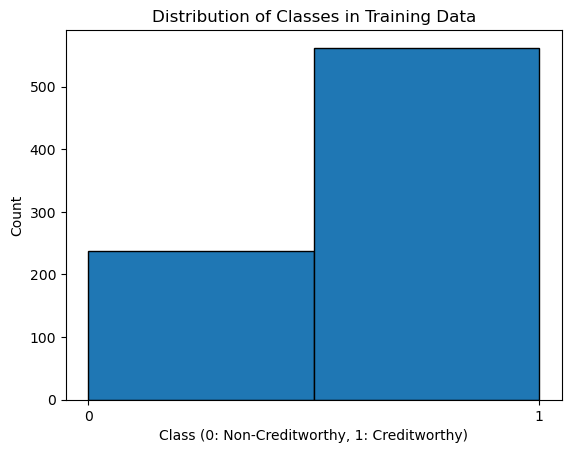

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [19]:
from sklearn.utils.discovery import all_estimators
print(*all_estimators(type_filter="classifier"))

('AdaBoostClassifier', <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>) ('BaggingClassifier', <class 'sklearn.ensemble._bagging.BaggingClassifier'>) ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>) ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>) ('CategoricalNB', <class 'sklearn.naive_bayes.CategoricalNB'>) ('ClassifierChain', <class 'sklearn.multioutput.ClassifierChain'>) ('ComplementNB', <class 'sklearn.naive_bayes.ComplementNB'>) ('DecisionTreeClassifier', <class 'sklearn.tree._classes.DecisionTreeClassifier'>) ('DummyClassifier', <class 'sklearn.dummy.DummyClassifier'>) ('ExtraTreeClassifier', <class 'sklearn.tree._classes.ExtraTreeClassifier'>) ('ExtraTreesClassifier', <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>) ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>) ('GaussianProcessClassifier', <class 'sklearn.gaussian_process._gpc.GaussianProcessClassifier'>) ('GradientBoostingClassifier', <class 'sklearn.e

In [ ]:
import itertools
from IPython.display import clear_output

param_grid = {
    'criterion' : ['entropy'],
    'n_estimators': range(10,13),
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_depth': range(3,5),
    'min_samples_split': range(2,10),
    'max_leaf_nodes': range(10,20),
}


combinations = list(itertools.product(*param_grid.values()))
bestParams = ''
bestScore = 0

for combination in combinations:
    params = dict(zip(param_grid.keys(), combination))

    
    
    rf_model = RandomForestClassifier(n_estimators=params['n_estimators'], criterion=params['criterion'], class_weight=params['class_weight'], max_depth=params['max_depth'],min_samples_split=params['min_samples_split'],max_leaf_nodes=params['max_leaf_nodes'],random_state=42)
    rf_model.fit(X_train, y_train)

    rf_pred = rf_model.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_pred)
    print(params)
    print(rf_roc_auc)
    if (rf_roc_auc > bestScore): 
        bestParams = params
        bestScore = rf_roc_auc
print()
print(bestParams)
print(bestScore)

In [42]:
import itertools
from IPython.display import clear_output

param_grid = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.5],
    'n_estimators' : [20, 50, 75, 100, 150],
    'subsample': [0.4, 0.6, 0.8, 1],
    'max_depth': [2, 5, 10, 50, 100],
    'min_samples_leaf' : [1,2,4,8,16, 32],
    'max_leaf_nodes': [2,4,8,16, 32]
}


combinations = list(itertools.product(*param_grid.values()))
bestParams = ''
bestScore = 0

for combination in combinations:
    params = dict(zip(param_grid.keys(), combination))

    gb_model = GradientBoostingClassifier(max_leaf_nodes=params['max_leaf_nodes'],learning_rate=params['learning_rate'], min_samples_leaf=params['min_samples_leaf'],subsample=params['subsample'], n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
    gb_model.fit(X_train, y_train)

    gb_pred = gb_model.predict(X_test)
    gb_roc_auc = roc_auc_score(y_test, gb_pred)
    print(params)
    print(gb_roc_auc)
    if (gb_roc_auc > bestScore): 
        bestParams = params
        bestScore = gb_roc_auc
print()
print(bestParams)
print(bestScore)

{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 2}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 4}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 8}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 16}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 32}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 2}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 4}
0.5
{'learning_rate': 0.01, 'n_estimators': 20, 'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 2, 'max_leaf_nodes

In [38]:
# Обучение Random Forest
rf_model = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', max_depth=4, n_estimators=11,random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.79
Accuracy: 0.79
Precision: 0.89
Recall: 0.79

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [ ]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели